In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pets = pd.read_csv("/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv")

pets

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


# **Descriptive Statistics**

In [3]:
# we'll take a closer look at the data

print(pets.describe())
print(pets.isna().sum())

             PetID    AgeMonths     WeightKg   Vaccinated  HealthCondition  \
count  2007.000000  2007.000000  2007.000000  2007.000000      2007.000000   
mean   1503.000000    92.279522    15.705776     0.701046         0.196313   
std     579.515315    52.148363     8.327749     0.457914         0.397307   
min     500.000000     1.000000     1.018198     0.000000         0.000000   
25%    1001.500000    48.000000     8.730396     0.000000         0.000000   
50%    1503.000000    94.000000    15.925416     1.000000         0.000000   
75%    2004.500000   138.000000    22.737180     1.000000         0.000000   
max    2506.000000   179.000000    29.995628     1.000000         1.000000   

       TimeInShelterDays  AdoptionFee  PreviousOwner  AdoptionLikelihood  
count        2007.000000  2007.000000    2007.000000         2007.000000  
mean           43.974091   249.142003       0.301943            0.328351  
std            25.740253   142.887040       0.459215            0.469730

In [4]:
# check for duplicates

print(pets.duplicated().sum())

0


**So far so good, no nulls, no duplicates, Let's continue**

# **Exploratory Data Analysis**

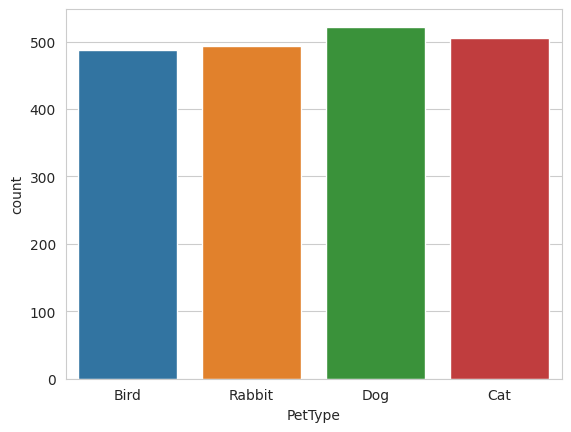

In [5]:
# set plot style

sns.set_style("whitegrid")

sns.countplot(data=pets, x="PetType")

plt.show()

**Very Interesting, Dogs are slightly more than the other animals followed by Cats, but we could nearly say that this shelter possesses 4 pet species that are nearly equal to one another in terms of number**

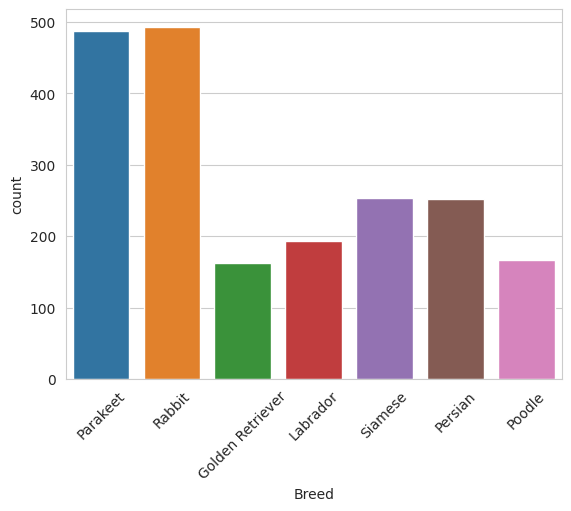

In [6]:
sns.countplot(data=pets, x="Breed")

plt.xticks(rotation=45)

plt.show()

**We know from the plot above that there are only 4 animal species in the shelter which are Dogs, Cats, Birds and Rabbits**

**So you've got:**
* **1 Bird Breed**
* **1 Rabbit Breed**
* **3 Dog Breeds**
* **2 Cat Breeds**

**Fair enough**

**Now I'd like to investigate how many of each Pet belongs to each breed!**

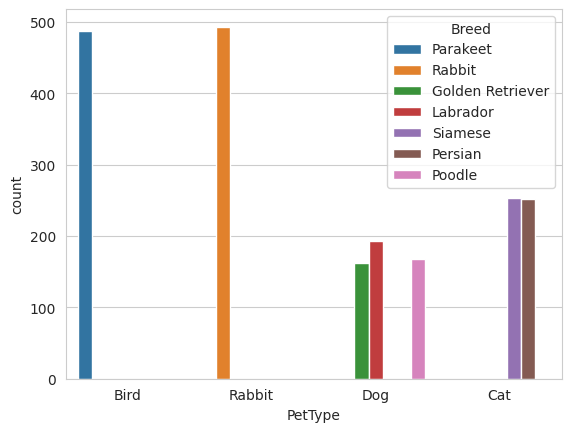

In [7]:
sns.countplot(data=pets, x="PetType", hue="Breed")

plt.show()

**Labradors are slightly more than other dog breeds**

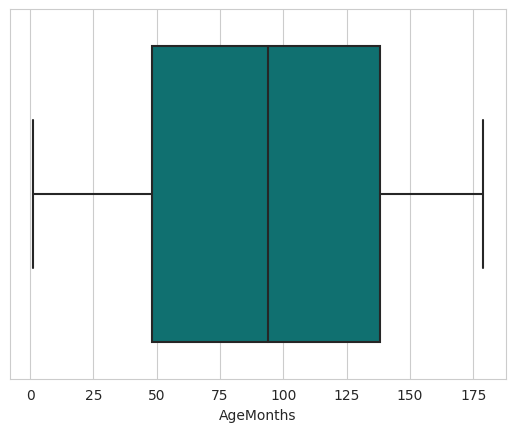

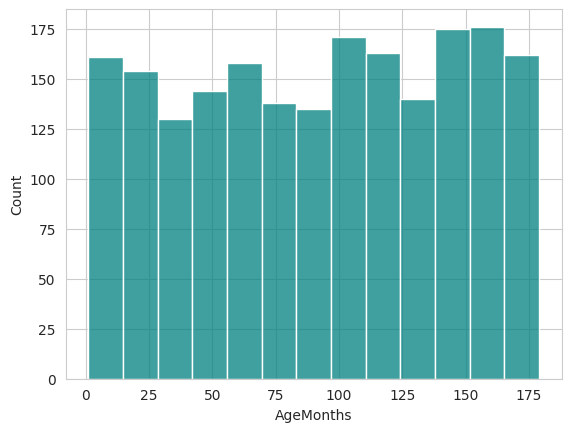

In [8]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

sns.boxplot(data=pets, x="AgeMonths", color="teal")

plt.show()

sns.histplot(data=pets, x="AgeMonths", color="teal")

plt.show()

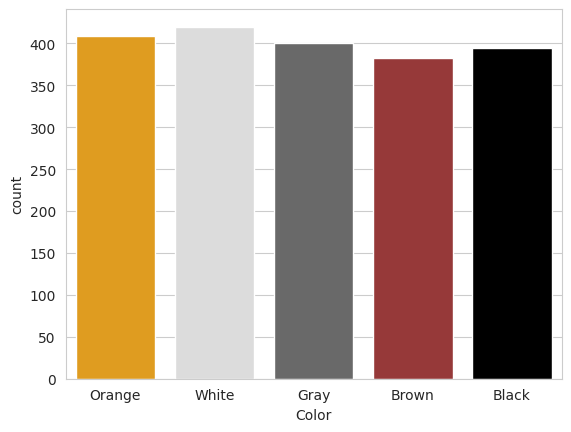

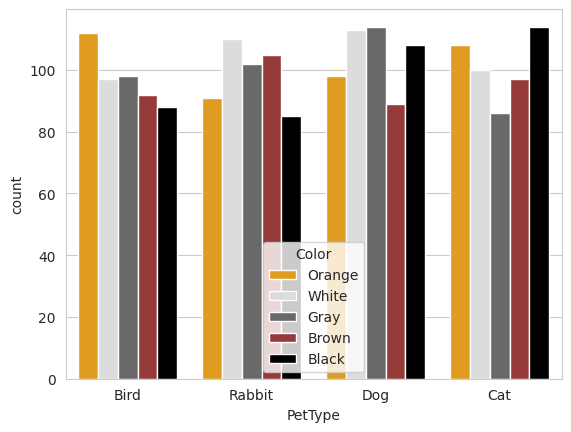

In [9]:
sns.countplot(data=pets, x="Color", palette=["orange", "gainsboro", "dimgray", "brown", "black"])

plt.show()

sns.countplot(data=pets, x="PetType", hue="Color", palette=["orange", "gainsboro", "dimgray", "brown", "black"])

plt.show()

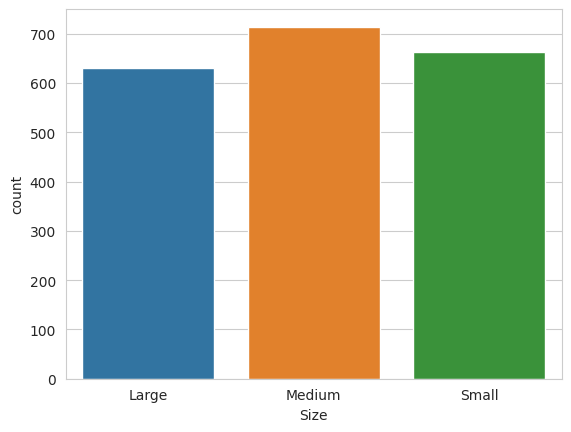

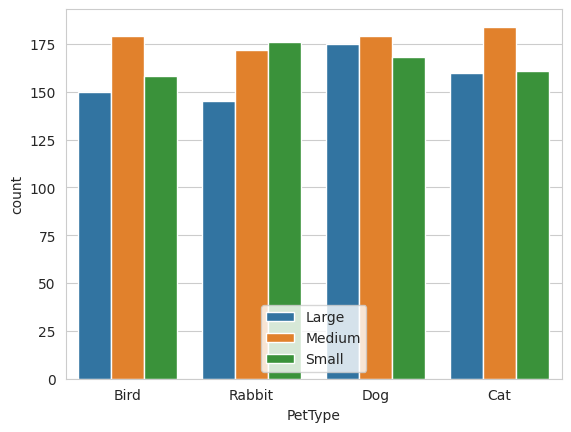

In [10]:
sns.countplot(data=pets, x="Size")

plt.show()

sns.countplot(data=pets, x="PetType", hue="Size")
plt.legend(loc='lower center')
plt.show()

**Medium is the most common size in all Pets here except Rabbits, where small is more common**

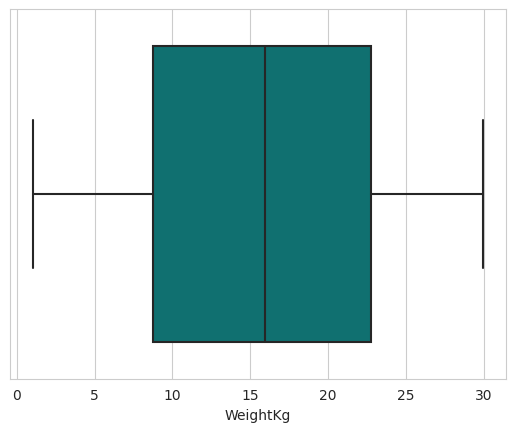

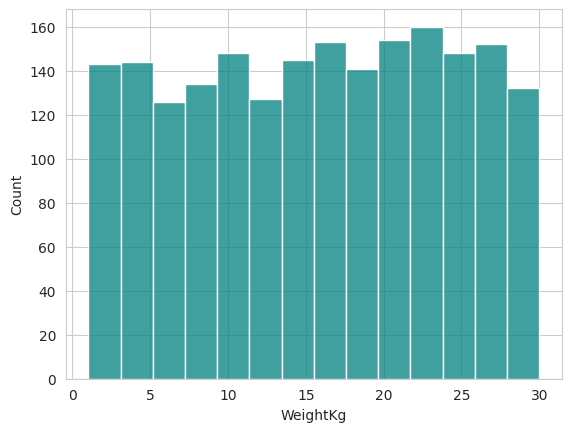

In [11]:
sns.boxplot(data=pets, x="WeightKg", color="teal")

plt.show()

sns.histplot(data=pets, x="WeightKg", color="teal")

plt.show()

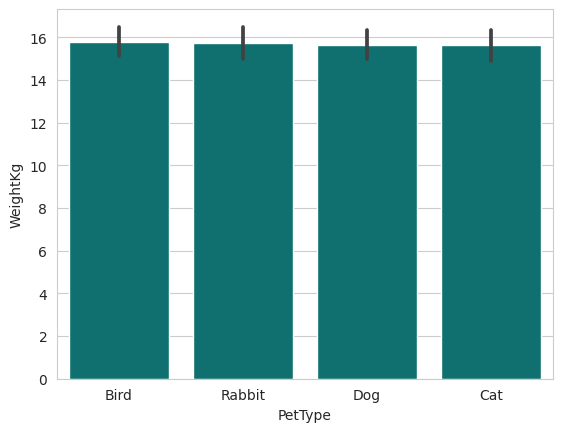

In [12]:
sns.barplot(data=pets, x="PetType", y="WeightKg", color="teal")

plt.show()

# **Wait A Minute!!!**

**I'm no Animals expert, But how is it the case that all Pets here have a mean weight of almost 16 KG???**

**We know that the mean is a reliable measure of central tendency here since we've seen the box plot of the WeightKg column and it has no outliers and we've also seen that the histogram of the same column yielded a uniform distribution**

**As a scientific fact, the average parakeet weight is usually around 100 grams, the average rabbit weight is around 2 or 3 KG depending on the breed, most pet breeds are even lighter!, the average cat weight is about 4 KG**

**At this point I assume that there is an issue with the WeightKg Column**


**But Hey!, let's repeat the previous plot with the Median instead of the mean so that we leave no space for doubt!**

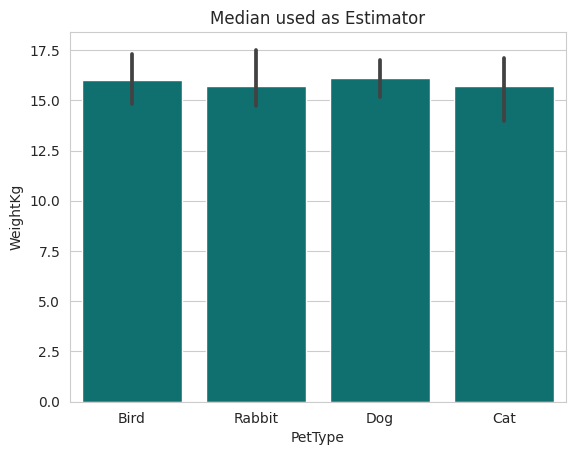

In [13]:
sns.barplot(data=pets, x="PetType", y="WeightKg", color="teal", estimator="median")

plt.title("Median used as Estimator")

plt.show()

# **Wait A Minute 2.0!**

**Take a close look at the plot above, You mean to tell me that more than 50% of Birds, Rabbits and Cats weighted over 15 KG!!!**

**You know, it's not really that Impossible, maybe mister kitty was taking steroids or something**




![](http://i.makeagif.com/media/10-10-2016/0oLHzI.gif)

**It's now obvious that the WeightKg column has issues, so we'll drop it**

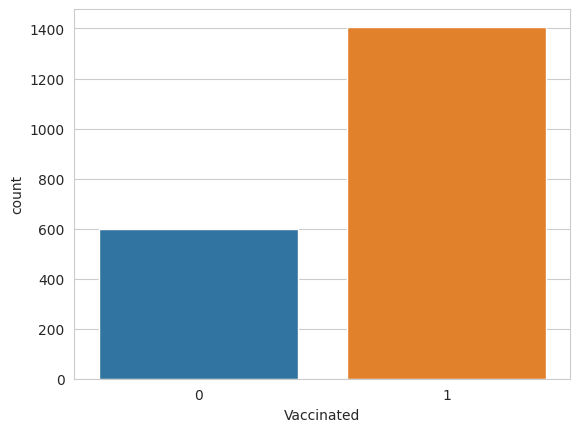

In [14]:
sns.countplot(data=pets, x="Vaccinated")

plt.show()

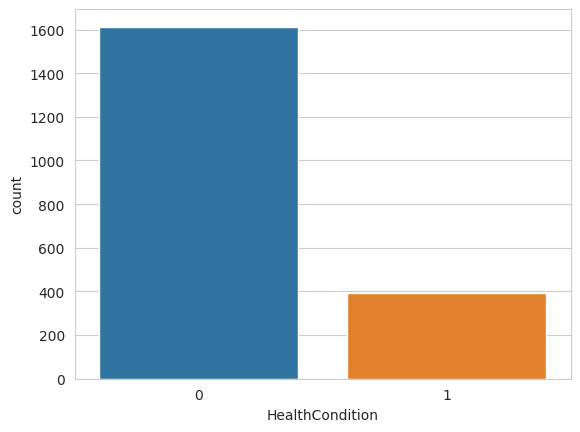

In [15]:
sns.countplot(data=pets, x="HealthCondition")

plt.show()

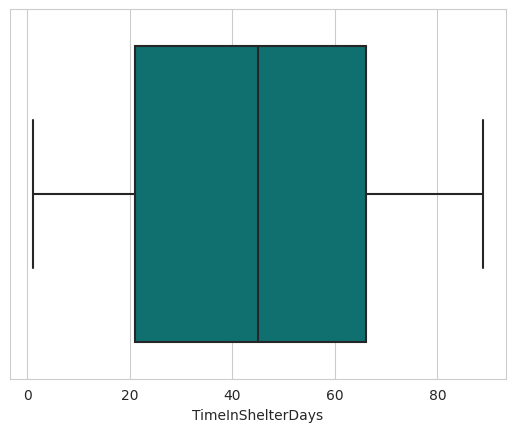

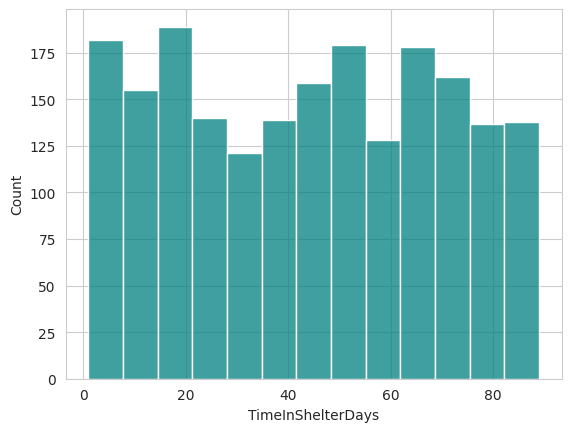

In [16]:
sns.boxplot(data=pets, x="TimeInShelterDays", color="teal")

plt.show()

sns.histplot(data=pets, x="TimeInShelterDays", color="teal")

plt.show()

**Nothing odd here, no Outliers, A uniform distribution**

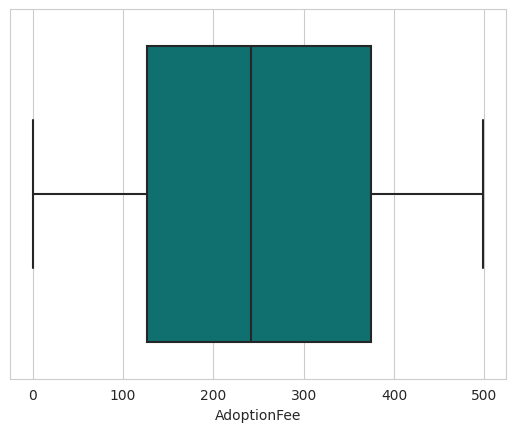

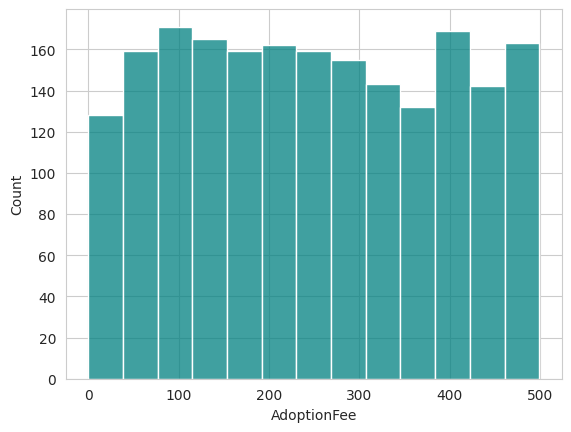

In [17]:
sns.boxplot(data=pets, x="AdoptionFee", color="teal")

plt.show()

sns.histplot(data=pets, x="AdoptionFee", color="teal")

plt.show()

**Same as above**

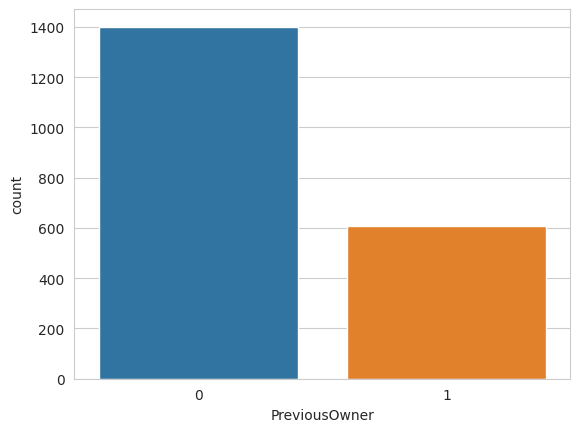

In [18]:
sns.countplot(data=pets, x="PreviousOwner")

plt.show()

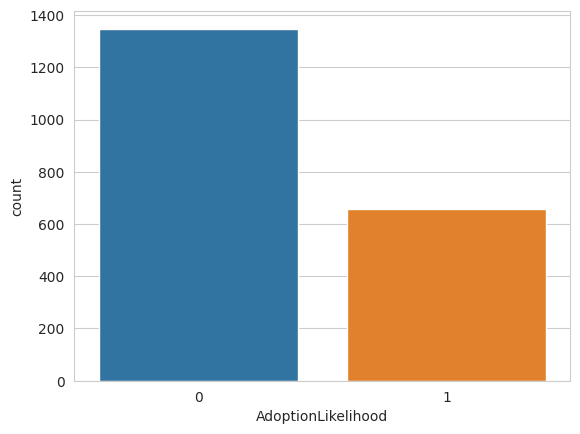

In [19]:
sns.countplot(data=pets, x="AdoptionLikelihood")

plt.show()

**Ratio between adopted and not adopted is almost 1:2**

# **Which categories were more likely to be adopted?**

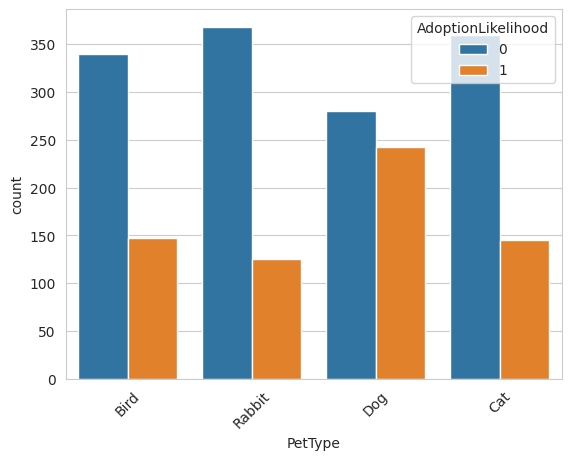

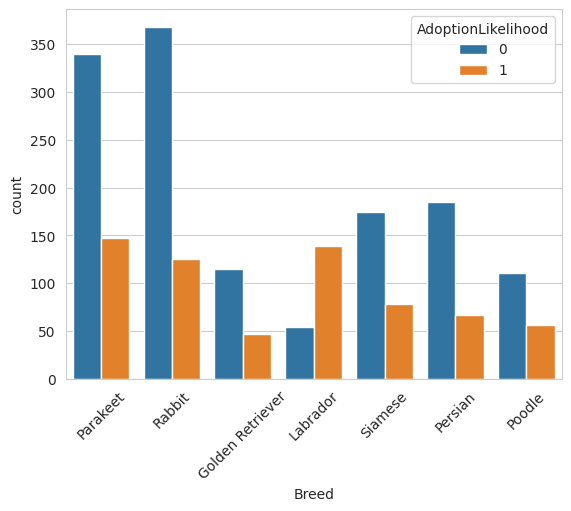

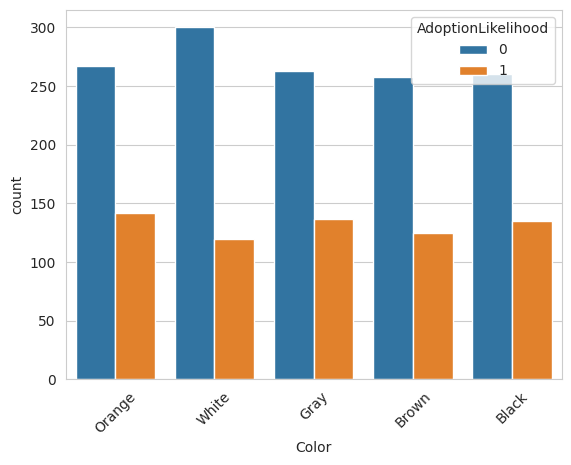

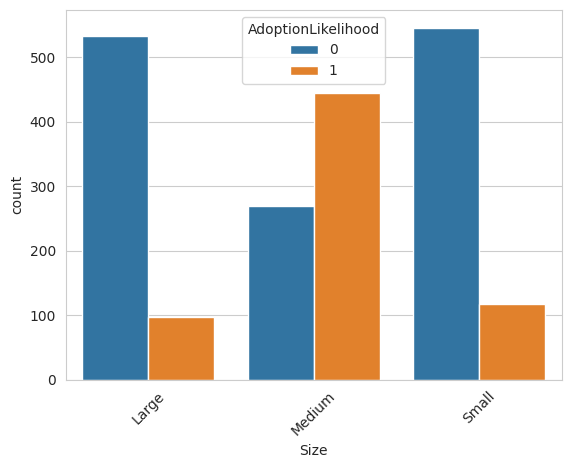

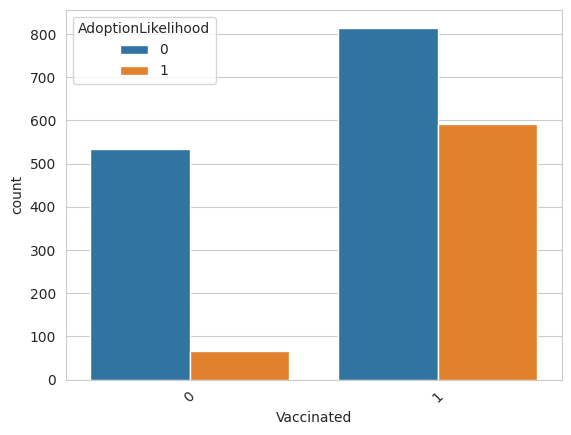

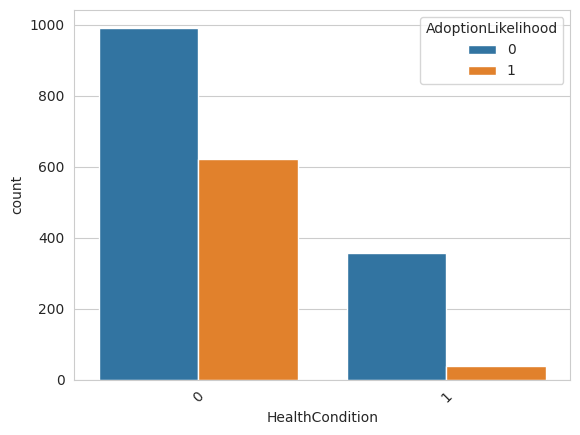

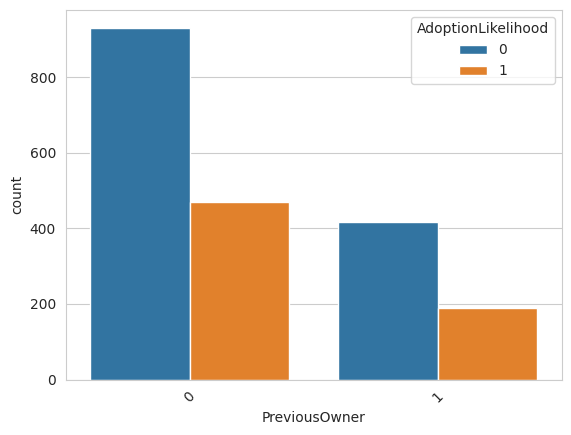

In [20]:
cols = ["PetType", "Breed", "Color", "Size", "Vaccinated", "HealthCondition", "PreviousOwner"]

for i in cols:
    
    sns.countplot(data=pets, x=i, hue="AdoptionLikelihood")
    plt.xticks(rotation=45)
    plt.show()

**Dogs are more likely to be adopted than other animals, most adopted breed is Labrador, nearly all colors are adopted with the same amount, Medium is the favoured size for adoption, also most of the animals adopted were vaccinated and most of the animals adopted didn't have a health condition, having a previous owner didn't seem to affect the adoption decision positively or negatively**

# **Correlation Matrix**

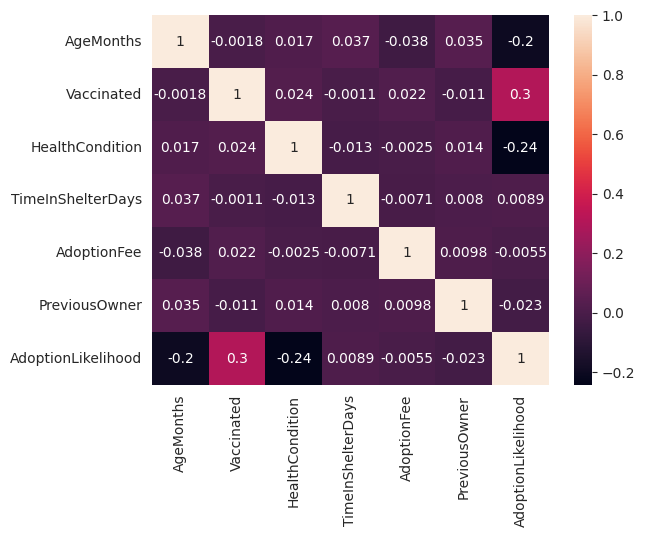

In [21]:
fig, ax = plt.subplots()

fig = sns.heatmap(pets.drop(["PetID", "PetType", "Breed", "Color", "Size", "WeightKg"], axis=1).corr(), annot=True)

plt.show()

**No strong correlation between any two features was detected**

**But we could see that the adoption likelihood is positively influenced by the Vaccinated column and negatively influenced by the HealthCondition column as well as the AgeMonths, which we have already noticed in the countplots before that!**

# **Machine Learning Models**

In [22]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [23]:
# We drop Irrelevant columns

pets_cleaned = pets.drop(["PetID", "WeightKg"], axis=1)

pets_cleaned = pd.get_dummies(pets_cleaned)


X = pets_cleaned.drop("AdoptionLikelihood", axis=1)
y = pets_cleaned["AdoptionLikelihood"]

print(X.head())
print(y)

   AgeMonths  Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  \
0        131           1                0                 27          140   
1         73           0                0                  8          235   
2        136           0                0                 85          385   
3         97           0                0                 61          217   
4        123           0                0                 28           14   

   PreviousOwner  PetType_Bird  PetType_Cat  PetType_Dog  PetType_Rabbit  ...  \
0              0          True        False        False           False  ...   
1              0         False        False        False            True  ...   
2              0         False        False         True           False  ...   
3              1          True        False        False           False  ...   
4              1         False        False        False            True  ...   

   Breed_Rabbit  Breed_Siamese  Color_Black  Color

In [24]:
# Create a list of dictionaries for the models to be plotted later

models = []

# **XGBoost Classifier**

In [25]:
model = xgb.XGBClassifier()


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)


print("Mean cross-validation score XGBoost:", scores.mean())

models.append({"Model":"XGBoost", "Optimized":False, "Score":scores.mean()})

Mean cross-validation score XGBoost: 0.9337253880224811


# **Random Forest Classifier**

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)


print("Mean cross-validation score Random Forest:", scores.mean())

models.append({"Model":"Random Forest", "Optimized":False, "Score":scores.mean()})

Mean cross-validation score Random Forest: 0.935721641170705


# **Decision Tree Classifier**

In [27]:
model = DecisionTreeClassifier(random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)


print("Mean cross-validation score Decision Tree:", scores.mean())

models.append({"Model":"Decision Tree", "Optimized":False, "Score":scores.mean()})

Mean cross-validation score Decision Tree: 0.8834220419101501


**Random Forest slightly outperforms XGBoost!, Now let's fine tune them Hyper-parameters and see what we get!**

# **XGBoost Classifier Optimization**

In [28]:
param_grid = {

    'max_depth': [3, 5, 7, 9],

    'learning_rate': [0.01, 0.1, 0.5, 1],

    'n_estimators': [50, 100, 200, 500],

    'gamma': [0, 0.1, 0.5, 1],

    'subsample': [0.5, 0.8, 1],

    'colsample_bytree': [0.5, 0.8, 1],

    'reg_alpha': [0, 0.1, 0.5, 1],

    'reg_lambda': [0, 0.1, 0.5, 1]

}


model = xgb.XGBClassifier()


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_iter=10, n_jobs=-1, verbose=False)


random_search.fit(X, y)


print("Best parameters:", random_search.best_params_)

print("Best cross-validation score:", random_search.best_score_)

models.append({"Model":"XGBoost", "Optimized":True, "Score":random_search.best_score_})

Best parameters: {'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}
Best cross-validation score: 0.9392054689147777


# **Random Forest Classifier Optimization**

In [29]:
param_grid = {

    'n_estimators': [50, 100, 200, 500, 1000],

    'max_depth': [None, 3, 5, 7, 10, 15],

    'min_samples_split': [2, 5, 10, 20, 50],

    'min_samples_leaf': [1, 5, 10, 20, 50],

    'criterion': ['gini', 'entropy'],

    'bootstrap': [True, False]

}


model = RandomForestClassifier(random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_iter=20, n_jobs=-1, verbose=False)


random_search.fit(X, y)


print("Best parameters:", random_search.best_params_)

print("Best cross-validation score:", random_search.best_score_)

models.append({"Model":"Random Forest", "Optimized":True, "Score":random_search.best_score_})

Best parameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}
Best cross-validation score: 0.9411992407042096


# **Decision Tree Classifier Optimization**

In [30]:
param_grid = {

    'criterion': ['gini', 'entropy'],

    'max_depth': [None, 3, 5, 7, 10, 15],

    'min_samples_split': [2, 5, 10, 20, 50],

    'min_samples_leaf': [1, 5, 10, 20, 50],

    'max_leaf_nodes': [None, 5, 10, 20, 50]

}


model = DecisionTreeClassifier(random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_iter=20, n_jobs=-1, verbose=False)


random_search.fit(X, y)


print("Best parameters:", random_search.best_params_)

print("Best cross-validation score:", random_search.best_score_)

models.append({"Model":"Decision Tree", "Optimized":True, "Score":random_search.best_score_})

Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_leaf_nodes': None, 'max_depth': 5, 'criterion': 'entropy'}
Best cross-validation score: 0.9421955062592277


**That was Great!, all of 'em showed a decent improvement!**

In [31]:
models = pd.DataFrame(models)

print(models)

           Model  Optimized     Score
0        XGBoost      False  0.933725
1  Random Forest      False  0.935722
2  Decision Tree      False  0.883422
3        XGBoost       True  0.939205
4  Random Forest       True  0.941199
5  Decision Tree       True  0.942196


# **Comparing Cross Validation Accuracy of different models**

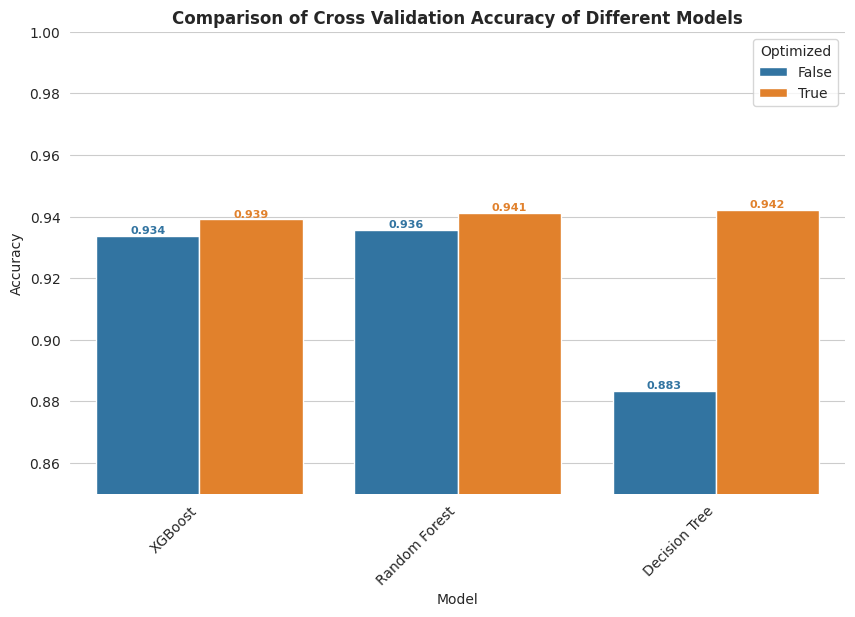

In [32]:
# Create the bar plot


fig, ax = plt.subplots(figsize=(10, 6))


sns.barplot(data=models, x="Model", y="Score", hue="Optimized", ax=ax)


sns.despine(left=True, bottom=True)


ax.set_ylabel("Accuracy")


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Set the y-axis limits to zoom in on the upper part of the plot

ax.set_ylim(0.85, 1)


# Add the title in bold font


plt.title("Comparison of Cross Validation Accuracy of Different Models", fontweight='bold')


# Add the scores to each bar with the same color as the bar


for p in ax.patches:


    color = p.get_facecolor()


    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=8, color=color, fontweight='bold')


plt.show()

# **One Last Thing!**

**Remember earlier in this Notebook when we saw with evidence that the WeightKg column was corrupt?**

**Now let's try to fit the same optimized models that we used here but we'll keep that column and see how that affects performance!**

In [33]:
pets_cleaned = pets.drop(["PetID"], axis=1)

pets_cleaned = pd.get_dummies(pets_cleaned)


X = pets_cleaned.drop("AdoptionLikelihood", axis=1)
y = pets_cleaned["AdoptionLikelihood"]




model = xgb.XGBClassifier(**{'subsample': 1, 'reg_lambda': 0,
                             'reg_alpha': 1, 'n_estimators': 500,
                             'max_depth': 5, 'learning_rate': 0.1,
                             'gamma': 1, 'colsample_bytree': 1})


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)


print("Mean cross-validation score XGBoost:", scores.mean())


################################################################################


model = RandomForestClassifier(**{'n_estimators': 500, 'min_samples_split': 2,
                                  'min_samples_leaf': 5, 'max_depth': 7,
                                  'criterion': 'entropy', 'bootstrap': False}, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)


print("Mean cross-validation score Random Forest:", scores.mean())


################################################################################


model = DecisionTreeClassifier(**{'min_samples_split': 20, 'min_samples_leaf': 10,
                                  'max_leaf_nodes': 50, 'max_depth': 5,
                                  'criterion': 'entropy'}, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(model, X, y, cv=cv,

                         scoring='accuracy',

                         n_jobs=-1, verbose=False)


print("Mean cross-validation score Decision Tree:", scores.mean())

Mean cross-validation score XGBoost: 0.9436880435726606
Mean cross-validation score Random Forest: 0.9406992469076065
Mean cross-validation score Decision Tree: 0.9337191846255009


**Aha!, so as expected, It gave inferior performance in all models!**

**but the negative effect of that corrupt column was not very significant due to the fact that tree based models are robust to irrelevant features, so maybe if I was using other models the effect would be more significant!**

**And that's a demonstration of the power of tree based models, I mean there is a reason for their popularity afterall!**

# **Conclusion**

**Oftentimes, you see people jumping straight to machine learning models without paying enough attention to Exploratory Data Analysis**

**But as we see here, the careful analysis and visualization that was conducted revealed the presence of a corrupt column!**

**And that corrupt column would have deteriorated the performance of any model used**

**So what's the point of using Fancy Machine Learning Models if you don't even understand or examine the data in front of you?**

**I hope this Notebook serves as a reminder of an Important yet often overlooked practice, Exploratory Data Analysis!**